In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [4]:
df = pd.read_csv('stud_math.csv')

In [5]:
def outliers(col):
    """для определения выбросов"""
    IQR = col.quantile(0.75) - col.quantile(0.25)
    perc25 = col.quantile(0.25)
    perc75 = col.quantile(0.75)

    print(
        '25-й перцентиль: {},'.format(perc25),
        '75-й перцентиль: {},'.format(perc75),
        "IQR: {}, ".format(IQR),
        "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    return

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [8]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [9]:
df.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

#### при осмотре налши лишний столбец. необходимо удалить

In [10]:
del df['studytime, granular']  # удаляем лишний столбец

In [11]:
# удобно назовём столбцы
df.columns = ['school', 'sex', 'age', 'adress', 'fam_size', 'p_status', 'm_edu', 'f_edu', 'm_job', 'f_job', 'reason', 'guardian', 'travel_time', 'study_time',
              'failures', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'fam_rel', 'free_time', 'go_out', 'health', 'absences', 'score']

In [12]:
df.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [13]:
df.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

In [14]:
df.age.isnull().sum()

0

In [15]:
df.adress.value_counts()

U    295
R     83
Name: adress, dtype: int64

In [16]:
mask = df["adress"].isna()
p = df["adress"].value_counts() / len(df["adress"].dropna())
df.loc[mask, "adress"] = np.random.choice(p.index.to_list(),
                                          size=mask.sum(),
                                          p=p.to_list())

In [17]:
df.fam_size.value_counts()

GT3    261
LE3    107
Name: fam_size, dtype: int64

In [18]:
mask = df["fam_size"].isna()
p = df["fam_size"].value_counts() / len(df["fam_size"].dropna())
df.loc[mask, "fam_size"] = np.random.choice(p.index.to_list(),
                                            size=mask.sum(),
                                            p=p.to_list())

In [19]:
df.p_status.value_counts()

T    314
A     36
Name: p_status, dtype: int64

In [20]:
mask = df["p_status"].isna()
p = df["p_status"].value_counts() / len(df["p_status"].dropna())
df.loc[mask, "p_status"] = np.random.choice(p.index.to_list(),
                                            size=mask.sum(),
                                            p=p.to_list())

In [21]:
df.m_edu.value_counts()

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: m_edu, dtype: int64

In [22]:
# заменили пустые значения на медианное
df.m_edu = df.m_edu.fillna(df.m_edu.median())

In [23]:
df.f_edu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: f_edu, dtype: int64

In [24]:
# заменили выброс на медианное значение
df.f_edu = df.f_edu.apply(lambda x: df.f_edu.median() if x > 4 else x)

In [25]:
# заменили пустые значения на медианное
df.f_edu = df.f_edu.fillna(df.f_edu.median())

In [26]:
df.m_job.value_counts()

other       133
services     98
at_home      58
teacher      55
health       32
Name: m_job, dtype: int64

In [27]:
mask = df["m_job"].isna()
p = df["m_job"].value_counts() / len(df["m_job"].dropna())
df.loc[mask, "m_job"] = np.random.choice(p.index.to_list(),
                                         size=mask.sum(),
                                         p=p.to_list())

In [28]:
df.f_job.value_counts()

other       197
services    102
teacher      29
at_home      16
health       15
Name: f_job, dtype: int64

In [29]:
mask = df["f_job"].isna()
p = df["f_job"].value_counts() / len(df["f_job"].dropna())
df.loc[mask, "f_job"] = np.random.choice(p.index.to_list(),
                                         size=mask.sum(),
                                         p=p.to_list())

In [30]:
df.reason.value_counts()

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

In [31]:
mask = df["reason"].isna()
p = df["reason"].value_counts() / len(df["reason"].dropna())
df.loc[mask, "reason"] = np.random.choice(p.index.to_list(),
                                          size=mask.sum(),
                                          p=p.to_list())

In [32]:
df.guardian.value_counts()

mother    250
father     86
other      28
Name: guardian, dtype: int64

In [33]:
mask = df["guardian"].isna()
p = df["guardian"].value_counts() / len(df["guardian"].dropna())
df.loc[mask, "guardian"] = np.random.choice(p.index.to_list(),
                                            size=mask.sum(),
                                            p=p.to_list())

In [34]:
df.travel_time.value_counts()

1.0    242
2.0     96
3.0     22
4.0      7
Name: travel_time, dtype: int64

In [35]:
# заменили пустые значения на медианное
df.travel_time = df.travel_time.fillna(df.travel_time.median())

In [36]:
df.study_time.value_counts()

2.0    194
1.0    103
3.0     64
4.0     27
Name: study_time, dtype: int64

In [37]:
# заменили пустые значения на медианное
df.study_time = df.study_time.fillna(df.travel_time.median())

In [38]:
df.failures.value_counts()

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

In [39]:
# заменили пустые значения на медианное
df.failures = df.failures.fillna(df.failures.median())

In [40]:
df.school_sup.value_counts()

no     335
yes     51
Name: school_sup, dtype: int64

In [41]:
mask = df["school_sup"].isna()
p = df["school_sup"].value_counts() / len(df["school_sup"].dropna())
df.loc[mask, "school_sup"] = np.random.choice(p.index.to_list(),
                                              size=mask.sum(),
                                              p=p.to_list())

In [42]:
df.fam_sup.value_counts()

yes    219
no     137
Name: fam_sup, dtype: int64

In [43]:
mask = df["fam_sup"].isna()
p = df["fam_sup"].value_counts() / len(df["fam_sup"].dropna())
df.loc[mask, "fam_sup"] = np.random.choice(p.index.to_list(),
                                           size=mask.sum(),
                                           p=p.to_list())

In [44]:
df.paid.value_counts()

no     200
yes    155
Name: paid, dtype: int64

In [45]:
mask = df["paid"].isna()
p = df["paid"].value_counts() / len(df["paid"].dropna())
df.loc[mask, "paid"] = np.random.choice(p.index.to_list(),
                                        size=mask.sum(),
                                        p=p.to_list())

In [46]:
df.activities.value_counts()

yes    195
no     186
Name: activities, dtype: int64

In [47]:
mask = df["activities"].isna()
p = df["activities"].value_counts() / len(df["activities"].dropna())
df.loc[mask, "activities"] = np.random.choice(p.index.to_list(),
                                              size=mask.sum(),
                                              p=p.to_list())

In [48]:
df.nursery.value_counts()

yes    300
no      79
Name: nursery, dtype: int64

In [49]:
mask = df["nursery"].isna()
p = df["nursery"].value_counts() / len(df["nursery"].dropna())
df.loc[mask, "nursery"] = np.random.choice(p.index.to_list(),
                                           size=mask.sum(),
                                           p=p.to_list())

In [50]:
df.higher.value_counts()

yes    356
no      19
Name: higher, dtype: int64

In [51]:
mask = df["higher"].isna()
p = df["higher"].value_counts() / len(df["higher"].dropna())
df.loc[mask, "higher"] = np.random.choice(p.index.to_list(),
                                          size=mask.sum(),
                                          p=p.to_list())

In [52]:
df.internet.value_counts()

yes    305
no      56
Name: internet, dtype: int64

In [53]:
mask = df["internet"].isna()
p = df["internet"].value_counts() / len(df["internet"].dropna())
df.loc[mask, "internet"] = np.random.choice(p.index.to_list(),
                                            size=mask.sum(),
                                            p=p.to_list())

In [54]:
df.romantic.value_counts()

no     240
yes    124
Name: romantic, dtype: int64

In [55]:
mask = df["romantic"].isna()
p = df["romantic"].value_counts() / len(df["romantic"].dropna())
df.loc[mask, "romantic"] = np.random.choice(p.index.to_list(),
                                            size=mask.sum(),
                                            p=p.to_list())

In [56]:
df.fam_rel.value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: fam_rel, dtype: int64

In [57]:
# заменили пустые значения на медианное
df.fam_rel = df.fam_rel.fillna(df.fam_rel.median())

In [58]:
# заменили некорректное значение за медианное
df.fam_rel = df.fam_rel.apply(lambda x: df.fam_rel.median() if x < 1 else x)

In [59]:
df.free_time.value_counts()

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: free_time, dtype: int64

In [60]:
# заменили пустые значения на медианное
df.free_time = df.free_time.fillna(df.free_time.median())

In [61]:
df.go_out.value_counts()

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: go_out, dtype: int64

In [81]:
# заменили пустые значения на медианное
df.go_out = df.go_out.fillna(df.go_out.median())

In [82]:
df.health.value_counts()

5.0    137
3.0     88
4.0     75
1.0     47
2.0     42
Name: health, dtype: int64

In [64]:
# заменили пустые значения на медианное
df.health = df.health.fillna(df.health.median())

In [65]:
df.absences.value_counts()

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

In [66]:
outliers(df.absences)  # проверяем на выбросы

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


содержит выбросы, необходимо устранить

In [67]:
absences_mean = round(df.absences[df.absences < 20].mean(), 0)

In [68]:
# устраняем выбросы, заменив их на медианное
df.absences = df.absences.apply(lambda x: x == absences_mean if x > 20 else x)

In [69]:
# заменили пустые значения на медианное
df.absences = df.absences.fillna(absences_mean)

In [70]:
df.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

In [71]:
# удалили строки с пустыми значениями score
df.dropna(subset=['score'], inplace=True)

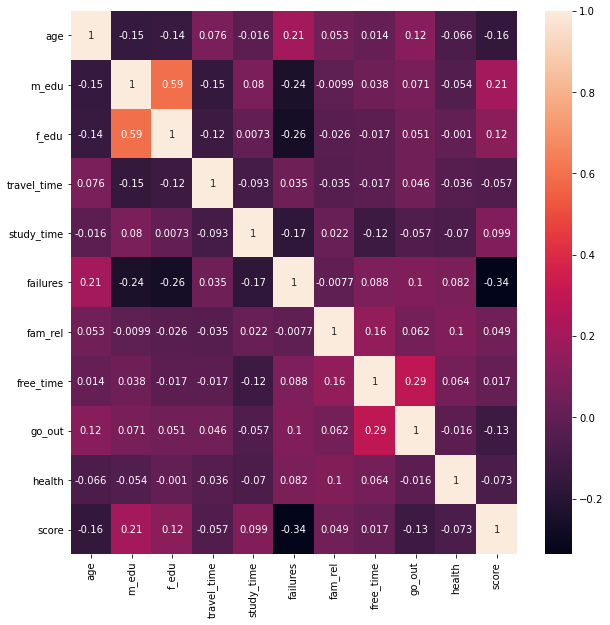

In [72]:
# cтроим тепловую карту для наглядности коэф-а коррекляции
sns.heatmap(df.corr(), annot=True)
fig = plt.gcf()
fig.set_size_inches(10, 10)

#### выраженная связь у двух признаков "f_edu" и 'm_edu'. Один можно удалить



In [73]:
def get_boxplot(column):
    """функция для построения боксплота столбцов"""
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title("Boxplot for " + column)
    plt.show()

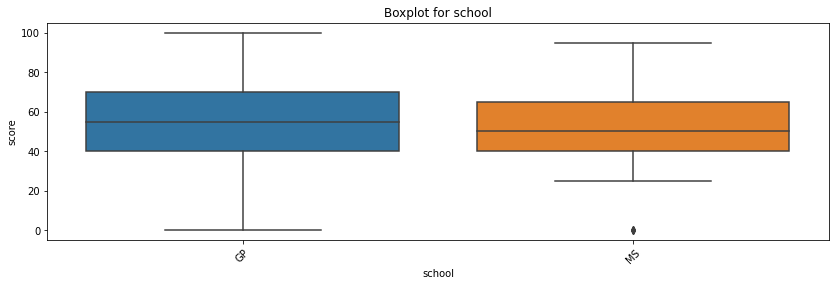

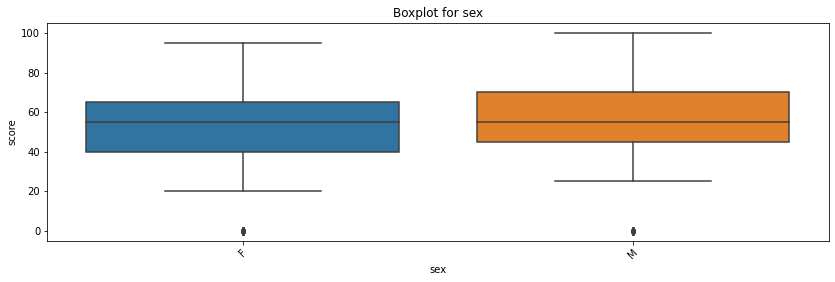

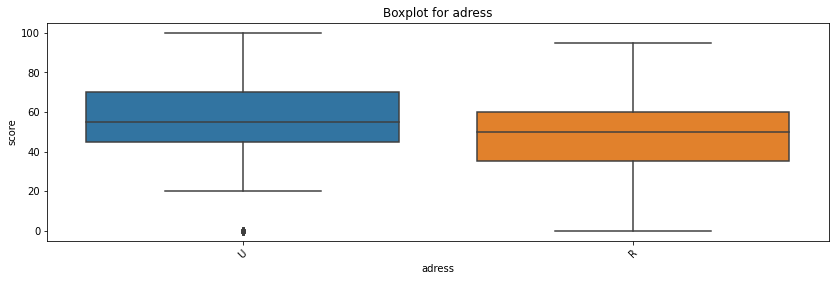

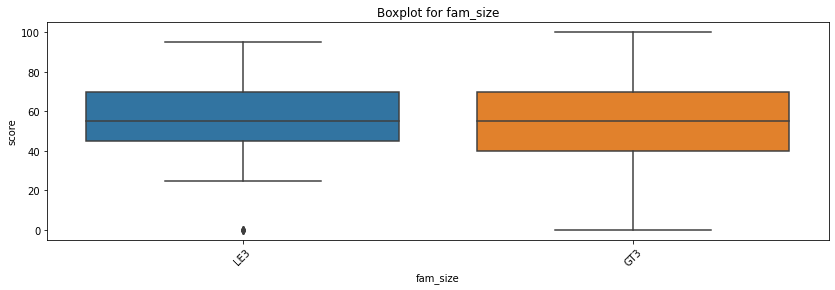

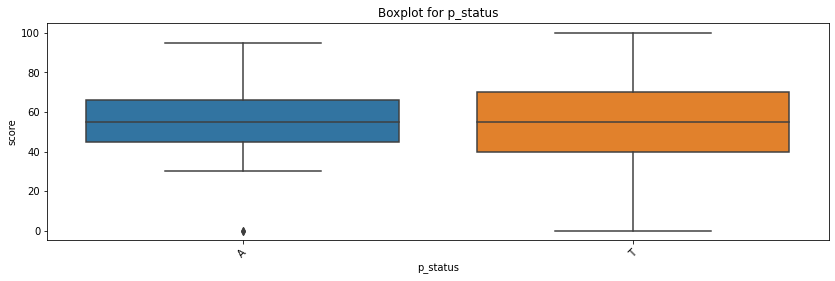

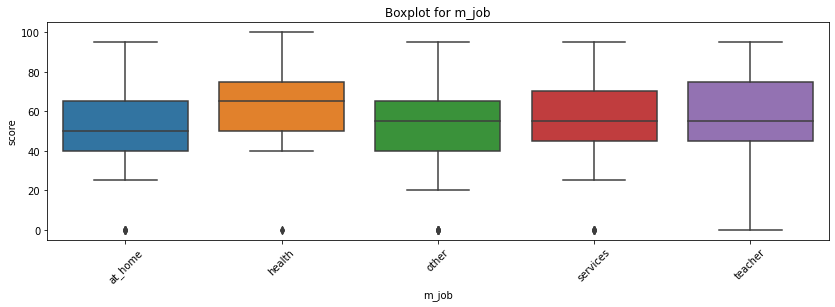

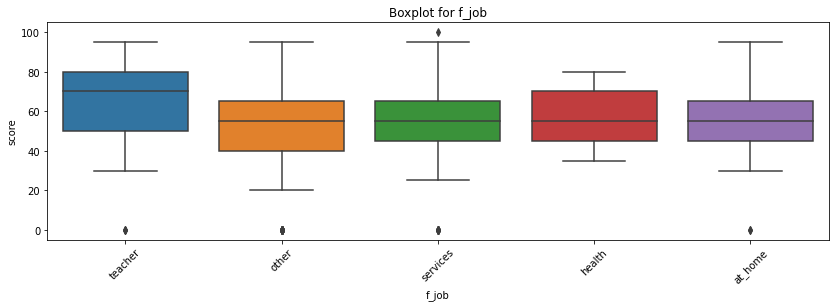

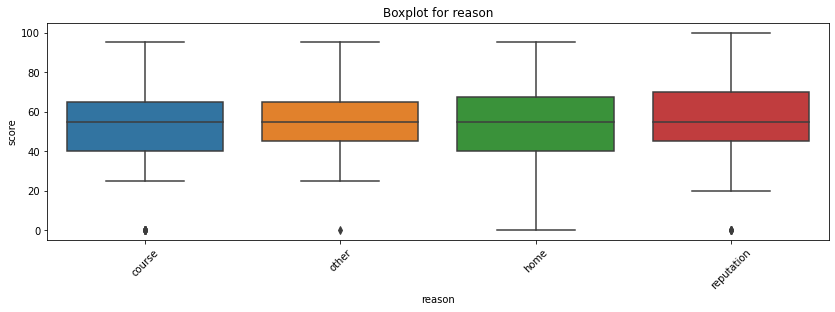

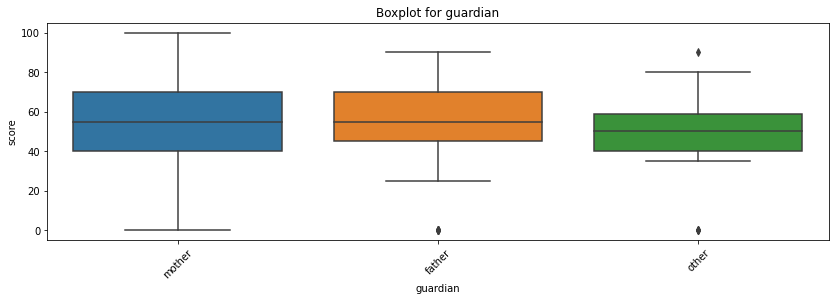

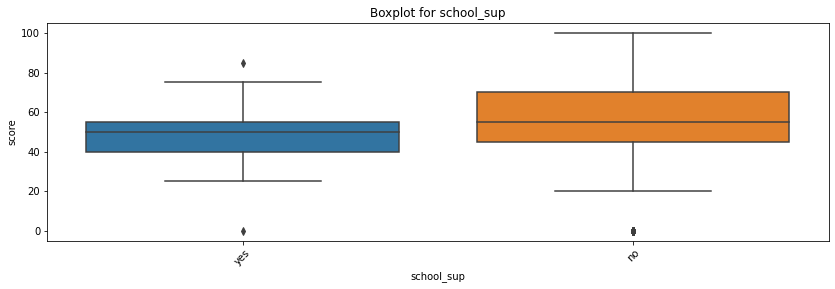

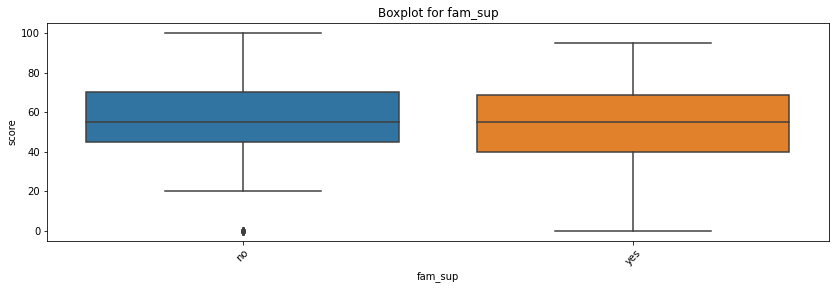

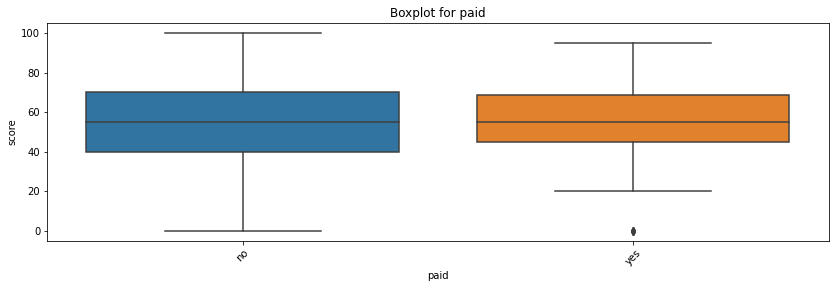

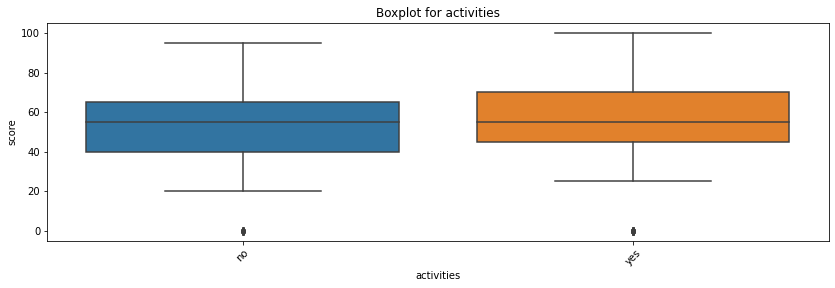

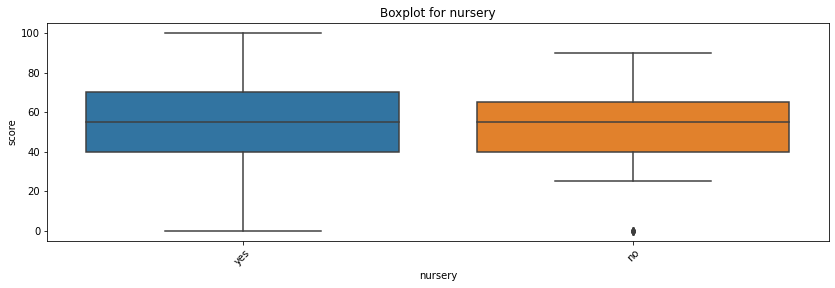

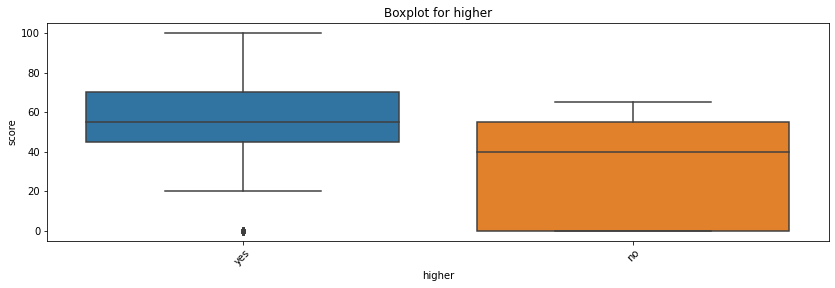

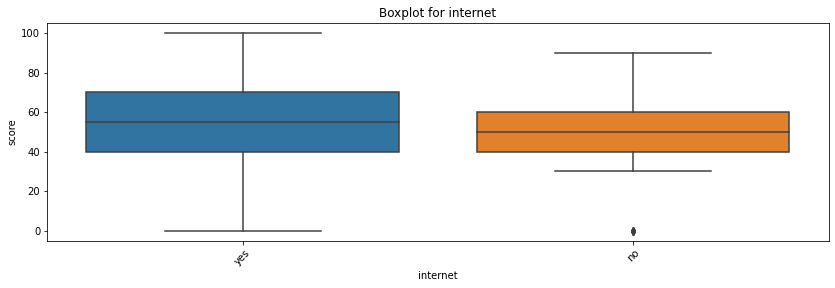

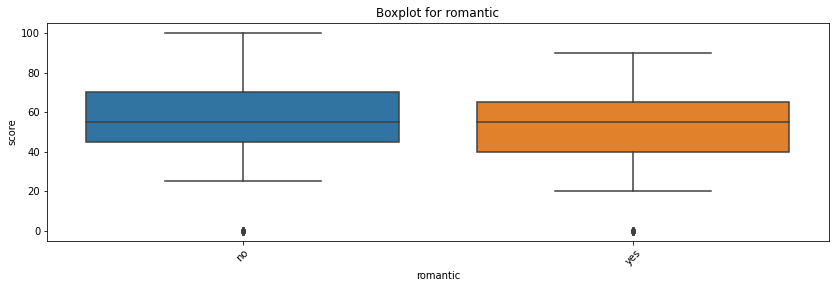

In [74]:
# строим боксплоты
for col in ['school', 'sex', 'adress', 'fam_size', 'p_status', 'm_job', 'f_job', 'reason', 'guardian', 'school_sup', 'fam_sup', 'paid',
            'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

###  При визуальном осмотре, можно обратить внимание на internet, higher, paid, school_sup, fam_sup, m_job, p_status и adress.
### Тем не менее, необходимо провести тест Стьюдента

In [75]:
def get_stat_dif(column):
    """функция для теста стьюдента"""
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [76]:
for col in ['school', 'sex', 'adress', 'fam_size', 'p_status', 'm_job', 'f_job', 'reason', 'guardian', 'school_sup', 'fam_sup', 'paid',
            'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки m_job
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [80]:
# Организуем столбцы, которые влияют на итоговый результат, в новый датасет
dates_for_model = df.loc[:, ['m_job', 'higher', 'romantic', 'f_edu', 'travel_time',
                             'study_time', 'failures', 'fam_rel', 'free_time', 'go_out', 'health', 'score']]

In [79]:
dates_for_model.head()

,m_job,higher,romantic,f_edu,travel_time,study_time,failures,fam_rel,free_time,go_out,health,score
0,at_home,yes,no,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,30.0
1,at_home,yes,no,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,30.0
2,at_home,yes,no,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,50.0
3,health,yes,yes,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,75.0
4,other,yes,no,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,50.0


####  В результате проведённого EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска, было выявлено следующее:
#### 1. В данный мало пустых значений. только столбец 'studytime, granular' не давал никаких новых данных.
#### 2. Выбросы отсутствовали практически везда. Можно сделать вывод, что данные для анализа достаточно чистые
#### 3. В результате корреляционного анализа, выявлено отсутствие корреляции между признаками и итоговым результатом 'score'
#### 4. В результате теста стьюдента были выявлены признаки, которые влияют на итоговою оценку. Это 'm_job', 'higher', 'romantic', 'f_edu', 'travel_time', 'study_time', 'failures', 'fam_rel', 'free_time', 'go_out' ,'health'